# Burgers Equation 

Mapping: $a(x) \to u(x,\, t{=}1)$ where $u$ satisfies the 1-D viscous Burgers equation
$$\partial_t u + u\,\partial_x u = \nu\,\partial_{xx} u, \quad x\in[0,1].$$

Data file: `.mat` with fields `a` (initial condition) and `u` (solution at $t{=}1$).

In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from sgpo.data.readers import MatReader

plt.rcParams.update({
    'figure.dpi': 120,
    'font.size': 11,
    'axes.titlesize': 13,
})

DATA_PATH = '/DATA/Sawan_projects/research/DATA/burgers_data_R10.mat'

In [2]:
reader = MatReader(DATA_PATH)
a = reader.read_field('a').numpy()   # (N, s) – initial conditions
u = reader.read_field('u').numpy()   # (N, s) – solutions at t=1

N, s = a.shape
x = np.linspace(0, 1, s)
print(f'Samples: {N},  Grid points: {s}')
print(f'a  – min: {a.min():.4f}, max: {a.max():.4f}, mean: {a.mean():.4f}')
print(f'u  – min: {u.min():.4f}, max: {u.max():.4f}, mean: {u.mean():.4f}')

Samples: 2048,  Grid points: 8192
a  – min: -2.2962, max: 2.6648, mean: 0.0000
u  – min: -1.7131, max: 1.8928, mean: -0.0000


##  Sample Input / Output Pairs

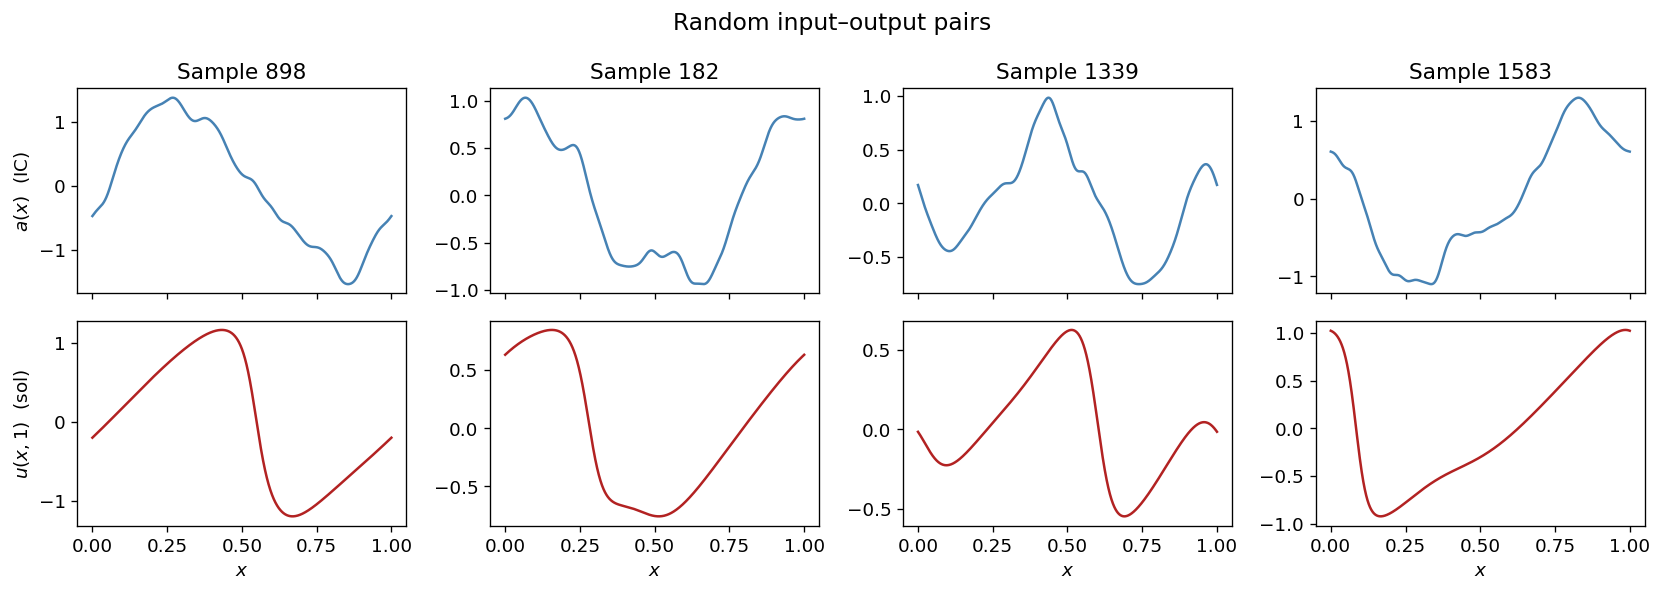

In [3]:
fig, axes = plt.subplots(2, 4, figsize=(14, 5), sharex=True)
idxs = np.random.default_rng(42).choice(N, 4, replace=False)
for col, idx in enumerate(idxs):
    axes[0, col].plot(x, a[idx], color='steelblue')
    axes[0, col].set_title(f'Sample {idx}')
    axes[1, col].plot(x, u[idx], color='firebrick')
axes[0, 0].set_ylabel('$a(x)$  (IC)')
axes[1, 0].set_ylabel('$u(x,1)$  (sol)')
for ax in axes[1]: ax.set_xlabel('$x$')
fig.suptitle('Random input–output pairs', fontsize=14)
fig.tight_layout()
plt.show()

##  Pixel Intensity Histograms

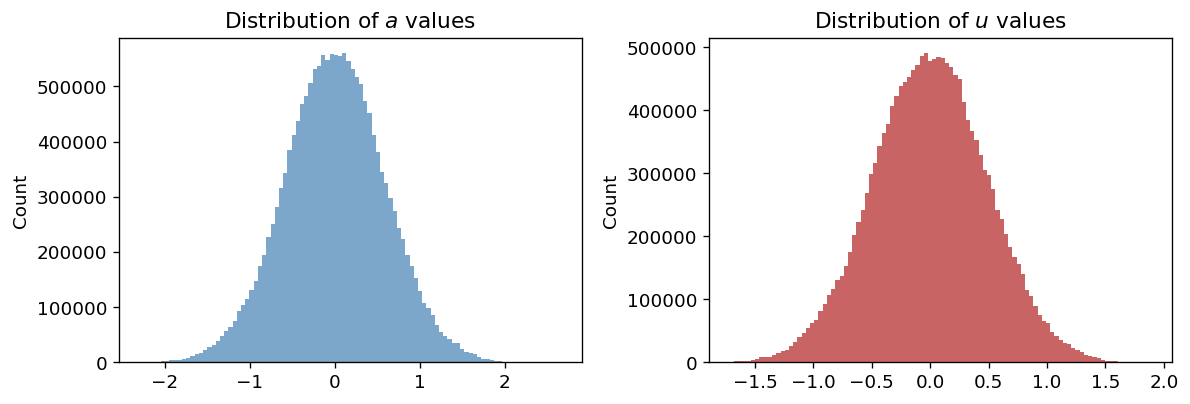

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
axes[0].hist(a.ravel(), bins=100, color='steelblue', alpha=0.7)
axes[0].set_title('Distribution of $a$ values')
axes[1].hist(u.ravel(), bins=100, color='firebrick', alpha=0.7)
axes[1].set_title('Distribution of $u$ values')
for ax in axes: ax.set_ylabel('Count')
fig.tight_layout()
plt.show()

##  Animation: Through Random Fields

Cycle through samples to visualise the diversity of initial conditions and resulting shock profiles.

In [5]:
n_anim = 60
idxs_anim = np.random.default_rng(0).choice(N, n_anim, replace=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
line_a, = ax1.plot(x, a[idxs_anim[0]], 'steelblue')
line_u, = ax2.plot(x, u[idxs_anim[0]], 'firebrick')
ax1.set_ylim(a.min() - 0.02, a.max() + 0.02)
ax2.set_ylim(u.min() - 0.02, u.max() + 0.02)
ax1.set_title('IC $a(x)$'); ax2.set_title('Solution $u(x,1)$')
title = fig.suptitle(f'Sample {idxs_anim[0]}')

def _update(frame):
    idx = idxs_anim[frame]
    line_a.set_ydata(a[idx])
    line_u.set_ydata(u[idx])
    title.set_text(f'Sample {idx}')
    return line_a, line_u, title

ani = animation.FuncAnimation(fig, _update, frames=n_anim, interval=250, blit=True)
plt.close(fig)
HTML(ani.to_jshtml())

##  Spectral Content (Fourier Modes)

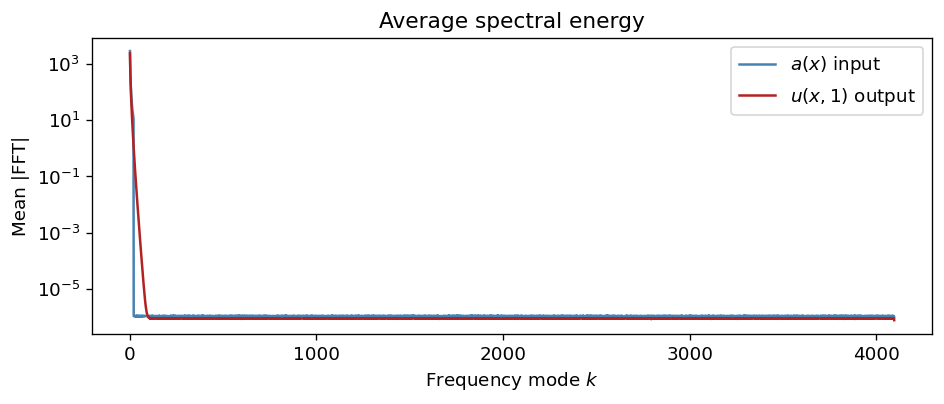

In [6]:
freqs = np.fft.rfftfreq(s, d=1.0/s)
a_fft = np.abs(np.fft.rfft(a, axis=1)).mean(axis=0)
u_fft = np.abs(np.fft.rfft(u, axis=1)).mean(axis=0)

fig, ax = plt.subplots(figsize=(8, 3.5))
ax.semilogy(freqs[1:], a_fft[1:], label='$a(x)$ input', color='steelblue')
ax.semilogy(freqs[1:], u_fft[1:], label='$u(x,1)$ output', color='firebrick')
ax.set_xlabel('Frequency mode $k$')
ax.set_ylabel('Mean |FFT|')
ax.set_title('Average spectral energy')
ax.legend()
fig.tight_layout()
plt.show()